### Partitioning Homework

The purpose of this homework is to build intuition about the different partitioning algorithms by applying them to a couple of informative graphs. The homework doesn't include the Girvan-Newman edge betweenness partitioning method since you've already done a homework problem for this algorithm.

The homework has you explore the folllowing partitioning algorithms
- Modularity-based methods
  - Spectral modularity partition
  - Louvain algorithm modularity partition
- Graph cut methods
  - Kernighan-Lin hill-climbing partition
  - Spectral modularity partition using
    - Graph Laplacian $L=D-V$
    - Random walk Laplacian $LD^{-1}$
    - Normalized Laplacian $D^{-1/2}LD^{-1/2}$

---


### Visualization Routines

I've collected the visualization routines into a python file called _partitioning\_utilities_. That file also contains each of the modularity cut and graph cut algorithms that we've discussed (plus their helper functions). Import the visualization routines.

In [2]:
from partitioning_utilities import show_partitions, show_dendrogram, show_graph
import networkx as nx
from typing import Hashable

---

### Three Networks

You'll apply the algorithms to three networks
  - The Les Miserables network
  - A network with three "natural" communities
  - A small world network

Let's visualize each, along with the dendrogram.

**Les Miserables network**

Vertices represent characters in the book _Les Miserables_. Edges between vertices occur if two characters appear in the same scene.

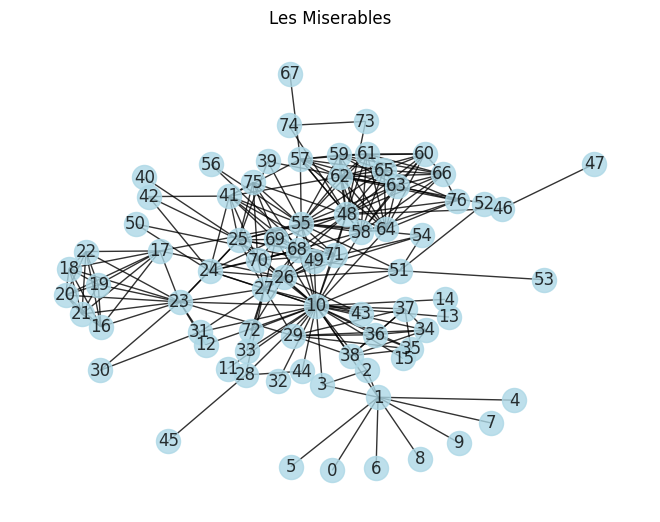

In [3]:
les_mis_graph = nx.les_miserables_graph()
# The labels of the nodes are character names. 
# Change these to ints so things display better
mapping = {name: i for i, name in enumerate(les_mis_graph.nodes())}
les_mis_graph = nx.relabel_nodes(les_mis_graph, mapping)
show_graph(les_mis_graph,title = "Les Miserables")


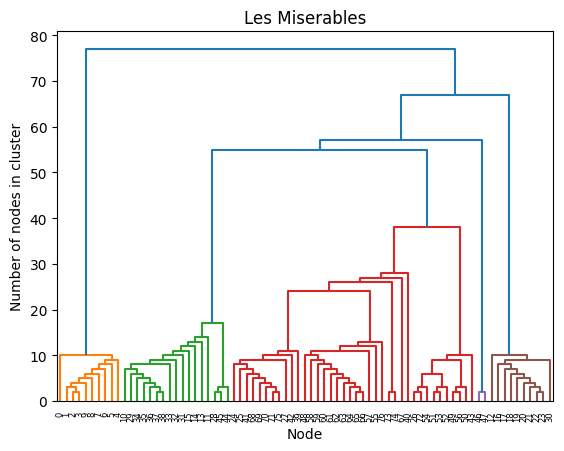

In [4]:
show_dendrogram(les_mis_graph, title="Les Miserables")

**Network with Natural Communities**

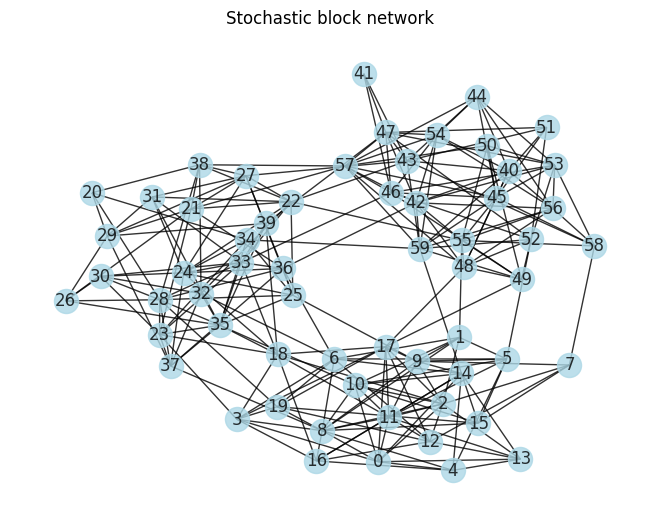

In [5]:
sizes = [20, 20, 20]
probs = [[0.35, 0.02, 0.02], [0.02, 0.35, 0.02], [0.02, 0.02, 0.40]]
affinity_graph = nx.stochastic_block_model(sizes, probs, seed=42)
show_graph(affinity_graph, title = "Stochastic block network")

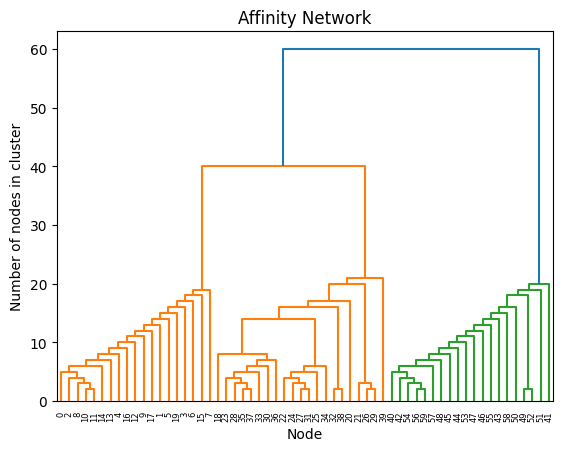

In [6]:
show_dendrogram(affinity_graph, title="Affinity Network")

**Small World Network**

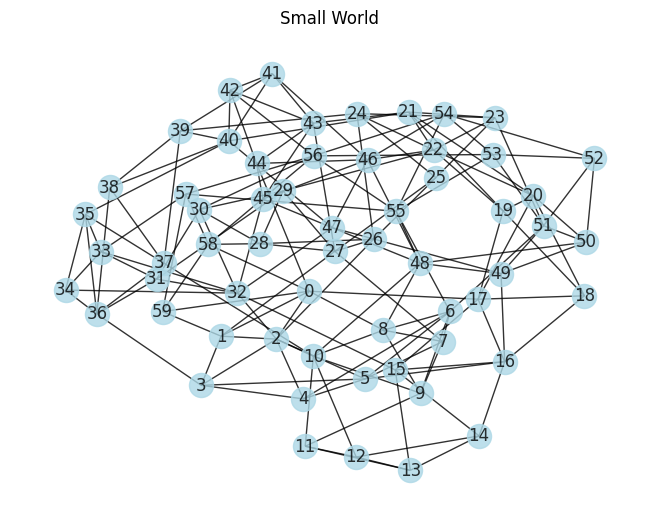

In [7]:
small_world = nx.newman_watts_strogatz_graph(60, 4, 0.3, seed = 42)
show_graph(small_world, title = "Small World")

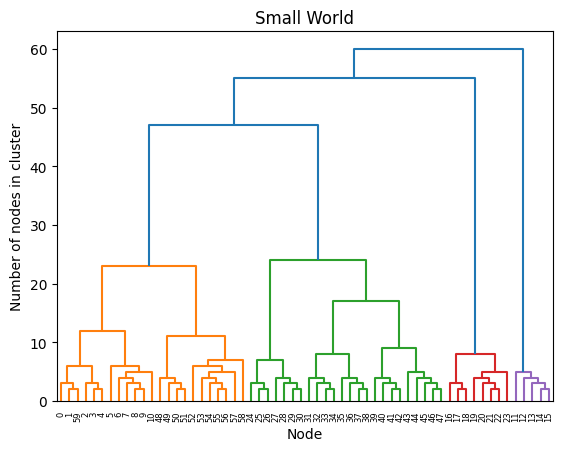

In [8]:
show_dendrogram(small_world, title = "Small World")

---

### Question Block A: Communities Found by the Louvain Algorithm

The following three questions are intended to build understanding of how well the Louvain algorithm works with the default parameters and what happens when we change the resolution parameter. 

The _resolution_ parameter influences whether the Louvain community detection algorithm favors a partition with many groups or few groups. The higher the parameter, the more the algorithm favors many groups in the partition, with each group having few members. The lower the parameter, the more the algorithm favors few groups in the partition, with each group having many members. 

### Problem 1: Louvain algorithm for the Affinity Graph

    Answer the questions in Problems a, b, and c before you run the code in the next three cells. Answer question d after you run the code in the next three cells.

**Problem 1a:**
How many communities do you predict will be found for the default parameters of the Louvain algorithm? Justify your prediction using observations from the dendrogram. 

**Problem 1b:**
What do you predict will happen if you raise the resolution parameter from the default value of 1.0 to 1.5? Why?

**Problem 1c:**
What do you predict will happen if you lower the resolution parameter from the default value of 1.0 to 0.5? Why?

**Problem 1d:**
Run the code below. Were your predictions correct? What can you conclude from the experiment about the modular structure of the affinity graph?

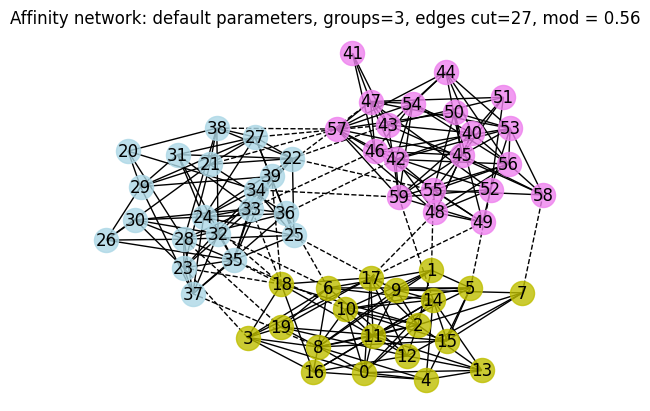

In [9]:
seed = 42
partition: list[set[Hashable]] = nx.community.louvain_communities(affinity_graph,
                                                                  seed=seed)
show_partitions(affinity_graph, 
                partition=partition,
                title="Affinity network: default parameters")

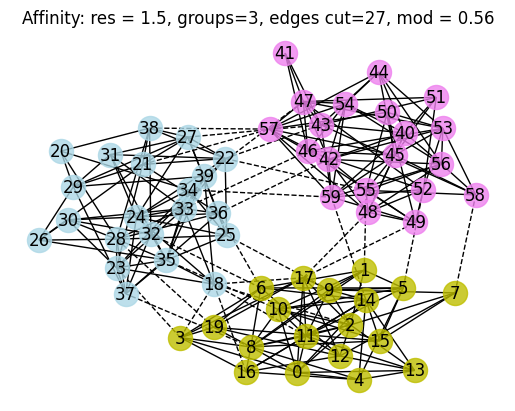

In [10]:
seed = 42
resolution: float = 1.5
partition: list[set[Hashable]] = nx.community.louvain_communities(affinity_graph,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(affinity_graph, 
                partition=partition,
                title=f"Affinity: res = {resolution}")

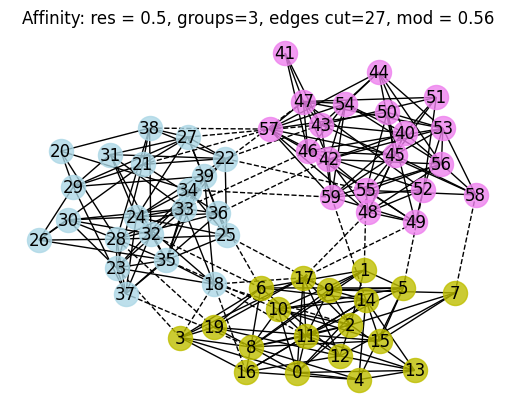

In [11]:
seed = 42
resolution: float = 0.5
partition: list[set[Hashable]] = nx.community.louvain_communities(affinity_graph,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(affinity_graph, 
                partition=partition,
                title=f"Affinity: res = {resolution}")

---

### Problem 2: Louvain algorithm for the Les Miserables Network

    Answer the questions in Problems a, b, and c before you run the code in the next three cells. Answer question d after you run the code in the next three cells.

**Problem 2a:**
How many communities do you predict will be found for the default parameters of the Louvain algorithm? Justify your prediction using observations from the dendrogram. 

**Problem 2b:**
What do you predict will happen if you raise the resolution parameter from the default value of 1.0 to 1.5? Why?

**Problem 2c:**
What do you predict will happen if you lower the resolution parameter from the default value of 1.0 to 0.5? Why?

**Problem 2d:**
Run the code below. Were your predictions correct? What can you conclude from the experiment about the modular structure of the affinity graph?

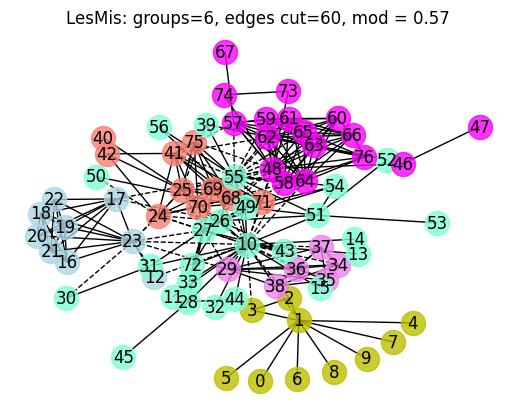

In [12]:
seed = 42
partition: list[set[Hashable]] = nx.community.louvain_communities(les_mis_graph,
                                                                  seed=seed)
show_partitions(les_mis_graph, 
                partition=partition,
                title="LesMis:")

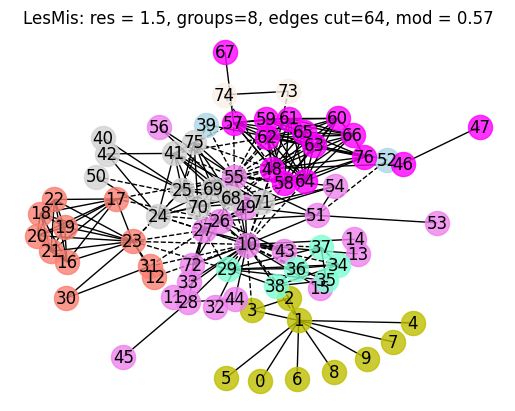

In [13]:
seed = 42
resolution: float = 1.5
partition: list[set[Hashable]] = nx.community.louvain_communities(les_mis_graph,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(les_mis_graph, 
                partition=partition,
                title=f"LesMis: res = {resolution}")

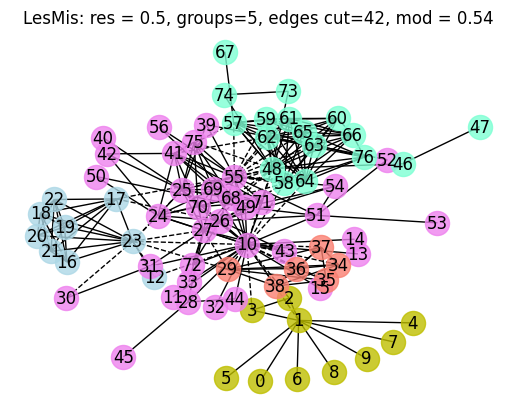

In [14]:
seed = 42
resolution: float = 0.5
partition: list[set[Hashable]] = nx.community.louvain_communities(les_mis_graph,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(les_mis_graph, 
                partition=partition,
                title=f"LesMis: res = {resolution}")

---

### Problem 3: Louvain algorithm for the Small World Graph

    Answer the questions in Problems a, b, and c before you run the code in the next three cells. Answer question d after you run the code in the next three cells.

**Problem 3a:**
How many communities do you predict will be found for the default parameters of the Louvain algorithm? Justify your prediction using observations from the dendrogram. 

**Problem 3b:**
What do you predict will happen if you raise the resolution parameter from the default value of 1.0 to 1.5? Why?

**Problem 3c:**
What do you predict will happen if you lower the resolution parameter from the default value of 1.0 to 0.5? Why?

**Problem 3d:**
Run the code below. Were your predictions correct? What can you conclude from the experiment about the modular structure of the affinity graph?

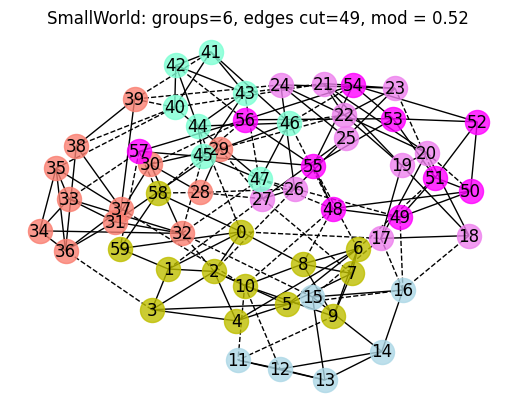

In [15]:
seed = 42
partition: list[set[Hashable]] = nx.community.louvain_communities(small_world,
                                                                  seed=seed)
show_partitions(small_world, 
                partition=partition,
                title="SmallWorld:")

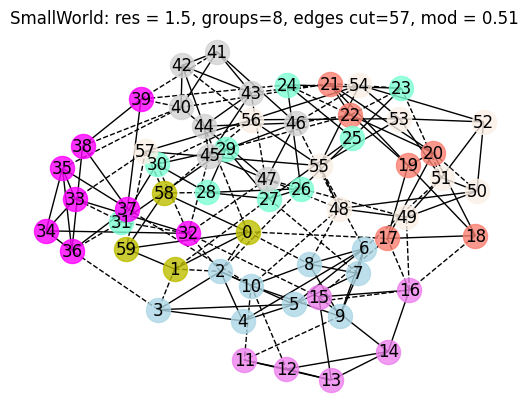

In [16]:
seed = 42
resolution: float = 1.5
partition: list[set[Hashable]] = nx.community.louvain_communities(small_world,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(small_world, 
                partition=partition,
                title=f"SmallWorld: res = {resolution}")


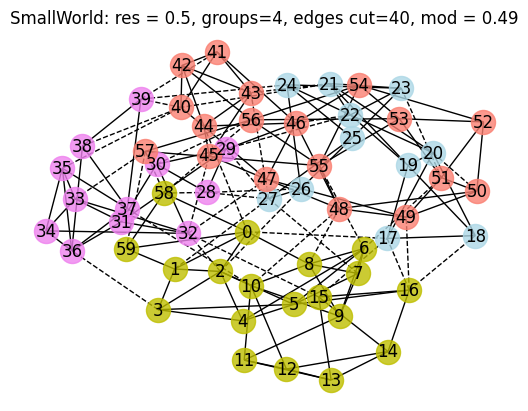

In [17]:

seed = 42
resolution: float = 0.5
partition: list[set[Hashable]] = nx.community.louvain_communities(small_world,
                                                                  seed=seed,
                                                                  resolution = resolution)
show_partitions(small_world, 
                partition=partition,
                title=f"SmallWorld: res = {resolution}")

---
---

### Homework Questions about Decomposition Algorithms

The next questions are about the decomposition algorithms:
  - Modularity-based partitioning
    - Newman's hill-climbing algorithm
    - The spectral partitioning algorithm using the leading eigenvector from the modularity matrix $B$
  - Graph cut-based partitioning
    - The Kernighan-Lin hill-climbing algorithm
    - The spectral partitioning algorithm using the fiedler eigenvector from for two of the three types of Laplacians
      - $L$: the standard Laplacian
      - $D^{-1/2}LD^{-1/2}$: the normalized Laplacian

Each of these decomposition algorithms partitions a set of nodes into two subsets. I think it is helpful to split the graph into more than two groups so that the outcomes of the algorithms can be compared to the partition generated by the Louvain algorithm. 

The code in the following cell takes a partition, finds the largest group within that partition, and splits that group. The key argument is the partitioning method to be used. This argument is a function that implements one of the algorithms above. That makes it possible to iteratively _sub-partition_ the groups until you have the same number of groups as were found by the Louvain algorithm.

In [18]:
from typing import Hashable, List, Set
from typing import Callable as function

def sub_partition(G: nx.Graph,
                  partition: List[Set[Hashable]],
                  partition_method: function
                  ) -> List[Set[Hashable]]:
    """ 
        Input: 
            • a networkx Graph
            • a list of subsets of the nodes in the graph that partition the nodes
            • a function that can be used to partition the nodes
        Algorithm:
            • find the group in the partition that has the most nodes
            • copy the remaining groups from that partition into a new partition
            • split the largest group by creating the subgraph and calling the partition function
            • add the newly formed subsets of the split group to the new partition

    """
    # make sure groups actually form a partition of G.nodes
    if set(G.nodes()) != set().union(*partition):  # The * unpacks the list
        raise ValueError("partition doesn't include all nodes in the graph")
    # find largest group
    largest_group: Set[Hashable] = max(partition, key=len)
    # new partition = the old minus the largest group
    new_partition: List[Set[Hashable]] = list(s for s in partition if s != largest_group)
    # form subgraph made up of largest group
    graph_of_partition: nx.Graph = nx.Graph(G.subgraph(largest_group))
    # partition the subgraph
    sub_partition = partition_method(graph_of_partition)
    # add the new grups from the subgraph into the new partition
    new_partition.extend(sub_partition)
    return new_partition

### Question Block B: Modularity-Based Partitions

Both Newman hill climbing and the leading eigenvalue of the modularity matrix split the nodes into two sets. To find more than two groups in the partition you have to apply the algorithm again on one of the groups in the partition.
 
 Import the code from _partitioning\_utilities_. The code is a slightly modified version of the code you played with in class.


In [19]:
from partitioning_utilities import Newman_hill_climbing
from partitioning_utilities import modularity_spectral_split


### Problem 4: Newman Hill-Climbing

    Answer problems 4a and 4b before you run any code. Answer problems 4c and 4d after you've run code.

**Problem 4a:**
On which of the networks (affinity graph, Les Miserables graph, small world network) do you predict that Newman Hill-Climbing will work well? Justify your answer using your understanding for how hill-climbing works compared to how the Louvain algorithm works.

**Problem 4b:**
How much will your answer to problem 4a be affected by the randomness used in the hill-climbing algorithm? In other words, how sensitive is the partition found by the algorithm to randomness for the various networks?

**Problem 4c:**
Run the code in the cells below. Was your answer to question 4a correct? Why or why not?

**Problem 4d:**
Run in the code in the cells below a few times. Was your answer to question 4c correct? Why or why not?

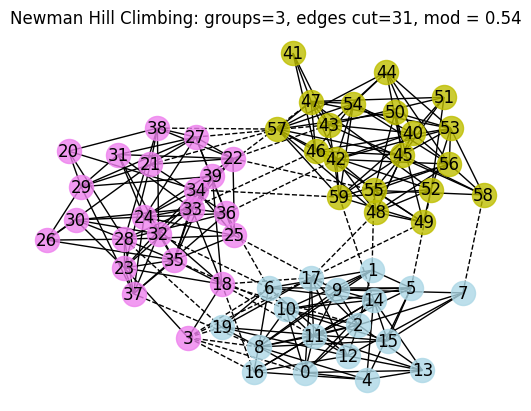

In [20]:
G = affinity_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = Newman_hill_climbing(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=Newman_hill_climbing) 

show_partitions(G, 
                partition=partition,
                title="Newman Hill Climbing:")

Les Miserables graph

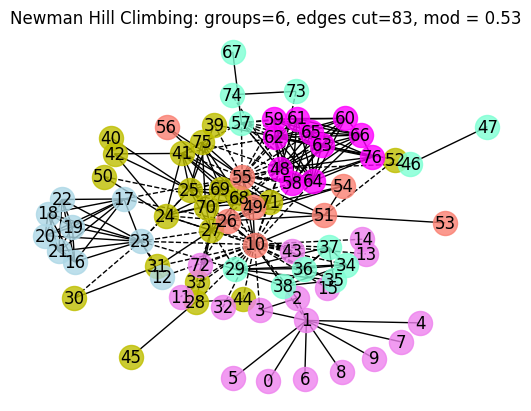

In [21]:
G = les_mis_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = Newman_hill_climbing(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition,partition_method=Newman_hill_climbing) 

show_partitions(G, 
                partition=partition,
                title="Newman Hill Climbing:")

Small world graph

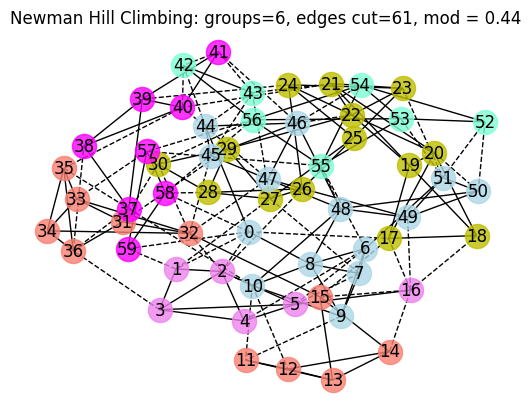

In [22]:
G = small_world
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = Newman_hill_climbing(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition,partition_method=Newman_hill_climbing) 

show_partitions(G, 
                partition=partition,
                title="Newman Hill Climbing:")

---

### Problem 5: Spectral Split using the Modularity Matrix

    Answer problems 5a and 5b before you run any code. Answer problems 5c and 5d after you've run code.

**Problem 5a:**
On which of the networks (affinity graph, Les Miserables graph, small world network) do you predict that modularity spectral split will work best? Justify your answer using your understanding of the leading eigenvector of the modularity matrix compared to how the Louvain algorithm works.

**Problem 5b:**
How will the partitions formed by the spectral split compare to the partitions formed by the hill-climbing algorithms

**Problem 5c:**
Run the code in the cells below. Were your answers to questions 5a and 5b correct? Why or why not?

**Problem 5d:**
Do you think it is a good idea to keep sub-partitioning the graph until it forms the same number of groups as those found by the Louvain algorithm? Why or why not? What would you use as a guideline for when to stop sub-partitioning?

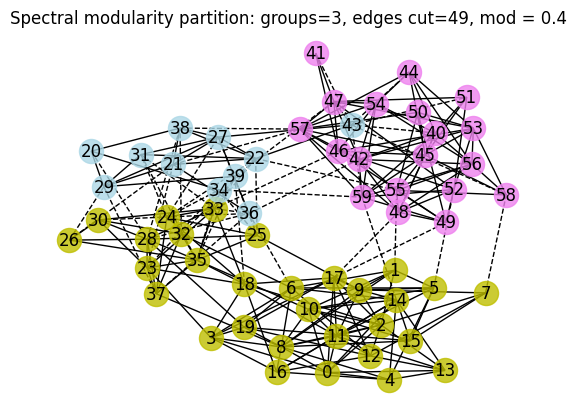

In [23]:
G = affinity_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = modularity_spectral_split(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=modularity_spectral_split) 
show_partitions(G, 
                partition, 
                title="Spectral modularity partition:")

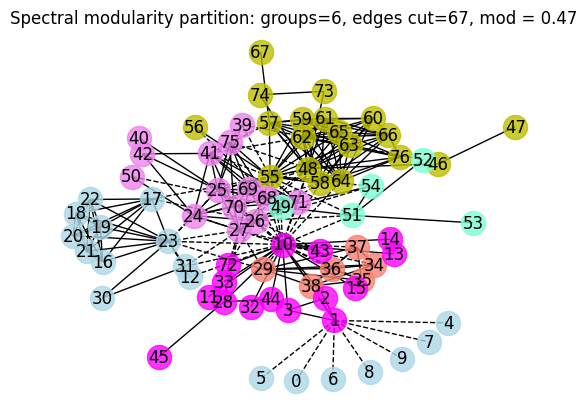

In [24]:
G = les_mis_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = modularity_spectral_split(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=modularity_spectral_split) 
show_partitions(G, 
                partition, 
                title="Spectral modularity partition:")

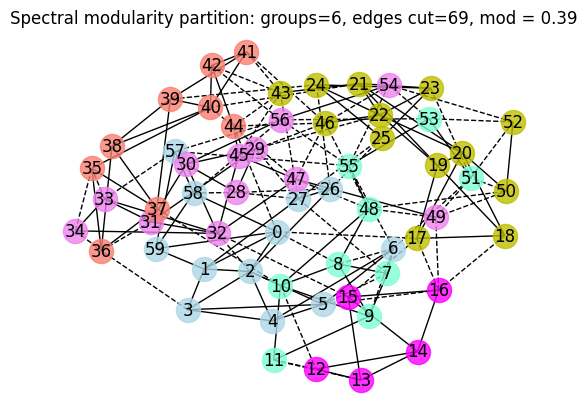

In [25]:
G = small_world
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = modularity_spectral_split(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=modularity_spectral_split) 
show_partitions(G, 
                partition, 
                title="Spectral modularity partition:")

---
---

### Question Block C: Partitions Based on Minimum Graph Cut

The minimum graph cut problem doesn't try to find a partition that maximizes modularity. Rather, it tries to find a partition that minimizes the number of edges cut between partitions, while maintaining balance between the groups in the partition. To find more than two groups in the partition you have to apply the algorithm again on one of the groups in the partition.
 
 Import the code from _partitioning\_utilities_. The code is either a slightly modified version of the code you played with in class or a straightforward implementation of finding the fiedler eigenvector as discussed in class.

 Import the graph cut algorithms from _partitioning\_utilities_.

In [26]:
from partitioning_utilities import kernighan_lin_bisection
from partitioning_utilities import laplacian_graph_cut
from partitioning_utilities import normalized_laplacian_graph_cut
from partitioning_utilities import randomwalk_laplacian_graph_cut
from partitioning_utilities import laplacian_graph_cut_sparse
from partitioning_utilities import normalized_laplacian_graph_cut_sparse
from partitioning_utilities import randomwalk_laplacian_graph_cut_sparse
from partitioning_utilities import get_shores_from_eigenvector_median


### Problem 6: Minimum Graph Cut Using the Kernigahn-Lin Algorithm

    Answer problems 6a and 6b before you run any code. Answer problems 6c and 6d after you've run code.

**Problem 6a:**
For each network (affinity graph, Les Miserables graph, small world network), how well with iteratively applying the Kernighan-Lin algorithm will work to find balanced graph cuts?  On which network will it work best and why?

**Problem 6b:**
How much will randomness affect the performance of the algorithm at finding partitions that cut few graph edges? Justify your answer using your understanding of where randomness appears in the Kernighan-Lin algorithm.

**Problem 6c:**
Run the code in the cells below. Were your answers to questions 5a and 5b correct? Why or why not?

**Problem 6d:**
For the affinity network, what patterns (if any) do you see in the modularity and number of edges cut when you compare Newman's hill-climbing algoirthm to the Kernighan-Lin hill-climbing algorithm?

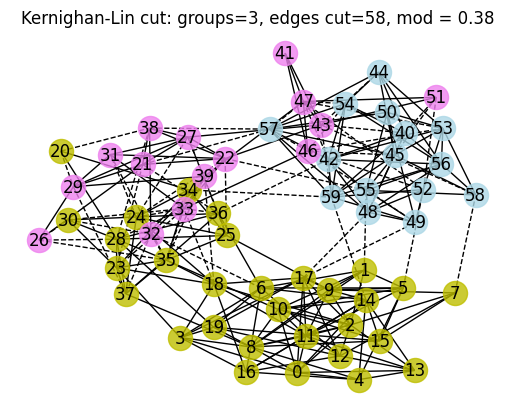

In [27]:
G = affinity_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = kernighan_lin_bisection(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=kernighan_lin_bisection) 
show_partitions(G, 
                partition, 
                title="Kernighan-Lin cut:")

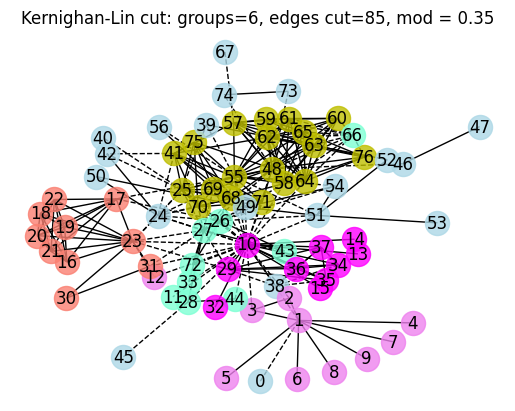

In [28]:
G = les_mis_graph
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = kernighan_lin_bisection(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=kernighan_lin_bisection) 
show_partitions(G, 
                partition, 
                title="Kernighan-Lin cut:")

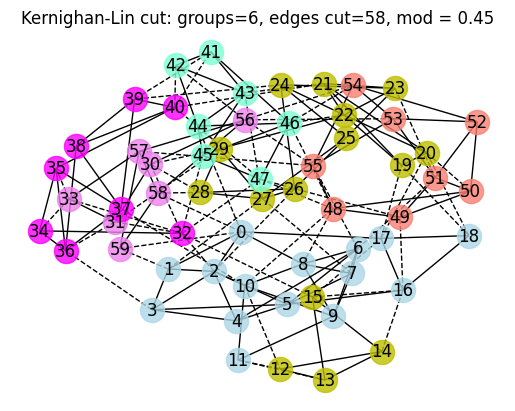

In [29]:
G = small_world
Louvain_partition: list[set[Hashable]] = nx.community.louvain_communities(G,seed = seed)
partition = kernighan_lin_bisection(G)
while len(partition) < len(Louvain_partition):
    partition = sub_partition(G, partition, partition_method=kernighan_lin_bisection) 
show_partitions(G, 
                partition, 
                title="Kernighan-Lin cut:")

---

### Problem 7: Spectral Graph Cut using the Laplacian and Normalized Laplacian Matrices

This question is intended to help you build understanding for how the different types of Laplacians affect the types of partitions formed. Specifically, the Laplacian and normalized Laplacian try to enforce _balance_ differently for the graph cuts.

Run the following three cells, which determine the graph cut using the fiedler eigenvector of the Laplacian. Note that I've hand-tuned the number of groups in the partition rather than setting it to the number of groups found by the Louvain algorithmn. 

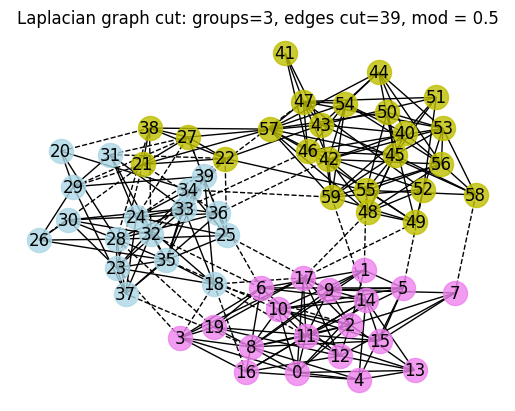

In [30]:
G = affinity_graph
partition = laplacian_graph_cut(G)
while len(partition) < 3:
    partition = sub_partition(G, partition, partition_method=laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Laplacian graph cut:")

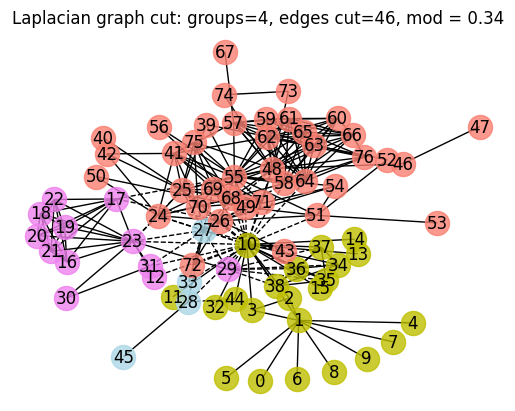

In [31]:
G = les_mis_graph
partition = laplacian_graph_cut(G)
while len(partition) < 4:
    partition = sub_partition(G, partition, partition_method=laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Laplacian graph cut:")

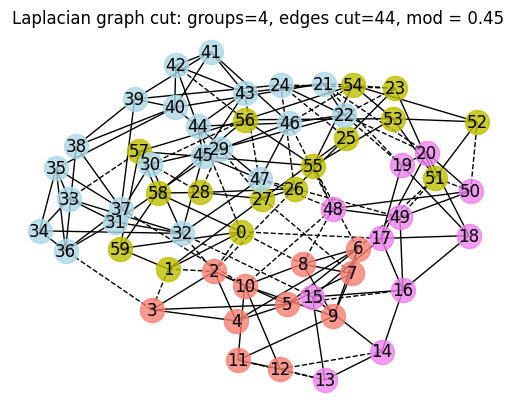

In [32]:
G = small_world
partition = laplacian_graph_cut(G)
while len(partition) < 4:
    partition = sub_partition(G, partition, partition_method=laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Laplacian graph cut:")

### Question 8: Normalized Laplacian Graph Cut

The normalized Laplacian graph cut defines "balance" by trying to have the same number of edges in each group in a binary partition rather than trying to have the same number of nodes in each group. 

     Answer questions 8a, 8b, and 8c before running code in the three cells below. Answer question 8d after runnin the code in the cells.

**Question 8a:**
What do you predict will will be different in the partition for the affinity graph using the normalized Laplacian compared to the partition obtained using the standard Laplacian? Justify your answer using your understanding for how the two types of Laplacians define balance.

**Question 8b:** 
Repeat question 8a for the Les Miserables graph.

**Question 8c:**
Repeat question 8c for the small world network.

**Question 8d:**
Discuss whether your predictions for questions 8a, 8b, and 8c were correct? Discuss what you learned about how different types of definitions for "balance" affect spectral approximations to the minimum graph cut.

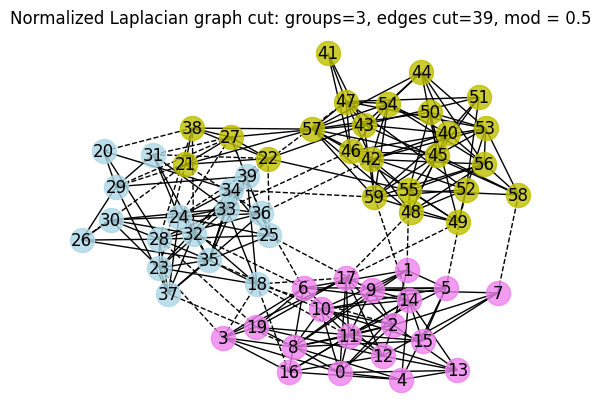

In [33]:
G = affinity_graph
partition = normalized_laplacian_graph_cut(G)
while len(partition) < 3:
    partition = sub_partition(G, partition, partition_method=normalized_laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Normalized Laplacian graph cut:")

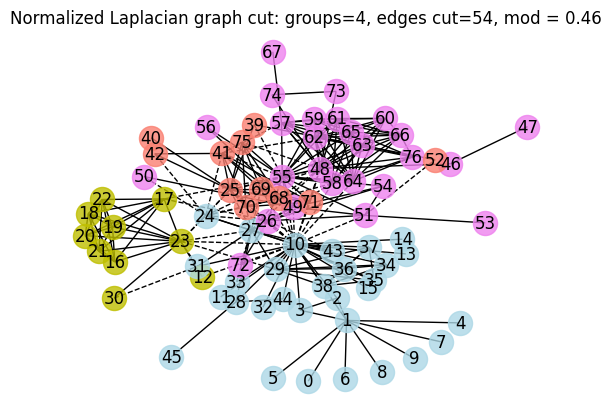

In [34]:
G = les_mis_graph
partition = normalized_laplacian_graph_cut(G)
while len(partition) < 4:
    partition = sub_partition(G, partition, partition_method=normalized_laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Normalized Laplacian graph cut:")

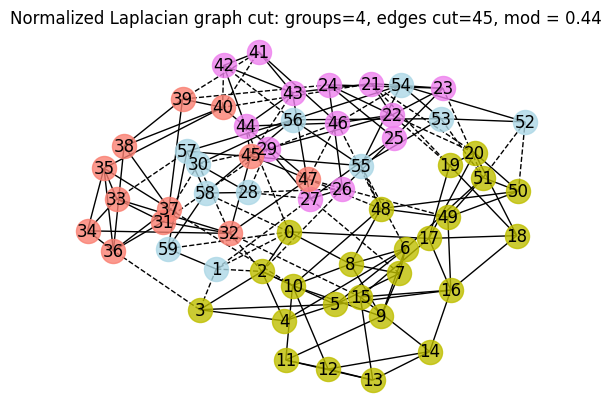

In [35]:
G = small_world
partition = normalized_laplacian_graph_cut(G)
while len(partition) < 4:
    partition = sub_partition(G, partition, partition_method=normalized_laplacian_graph_cut) 
show_partitions(G, 
                partition, 
                title="Normalized Laplacian graph cut:")

---
---

### Question 9: Which Algorithms Worked "Best"

The purpose of asking the next questions is to help you consolidate the observations you've made in the homework. 

**Question 9a:**
Which algorithm worked best when applied to the affinity graph? Which algorithm worked worst? How did you define best or worst? Jusitfy your answer.

**Question 9b:**
Which algorithm worked best when applied to the Les Miserables graph? Which algorithm worked worst? How did you define best or worst? Jusitfy your answer.

**Question 9c:**
Which algorithm worked best when applied to the small world graph? Which algorithm worked worst? How did you define best or worst? Jusitfy your answer.

---
---